In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../')

In [18]:
from pprint import pprint
import numpy as np
import descarteslabs as dl

from src.ReMasFrame import *

In [58]:
nasa_df

,location_description,landslide_size,event_date,landslide_category,landslide_trigger,fatality_count,injury_count,longitude,latitude,geometry
0,"Sigou Village, Loufan County, Shanxi Province",large,2008-08-01,landslide,rain,11.0,NaN,107.450000,32.562500,POINT (107.45000 32.56250)
1,"Lake Oswego, Oregon",small,2009-01-02,mudslide,downpour,0.0,NaN,-122.663000,45.420000,POINT (-122.66300 45.42000)
2,"San Ramon district, 195 miles northeast of the...",large,2007-01-19,landslide,downpour,10.0,NaN,-75.358700,-11.129500,POINT (-75.35870 -11.12950)
3,Dailekh district,medium,2009-07-31,landslide,monsoon,1.0,NaN,81.708000,28.837800,POINT (81.70800 28.83780)
5,"Paguite, Abuyog, Leyte",medium,2012-02-16,landslide,downpour,0.0,NaN,124.966800,10.700400,POINT (124.96680 10.70040)
...,...,...,...,...,...,...,...,...,...,...
11025,"Marine View Dr, Tacoma, Washington, 98422",small,2016-11-01,landslide,rain,0.0,0.0,-122.409942,47.290915,POINT (-122.40994 47.29092)
11026,"Tamisk, North Ossetia, Russia",small,2017-06-21,mudslide,rain,0.0,0.0,44.211414,42.954914,POINT (44.21141 42.95491)
11027,"509 S Sunset Terrace, Above Highway 97, Harris...",small,2017-03-23,mudslide,rain,0.0,0.0,-116.777680,47.449165,POINT (-116.77768 47.44917)
11028,"Banaran, Ponorogo, Jawa Timur, Indonesia",medium,2017-04-01,landslide,rain,27.0,0.0,111.679944,-7.853409,POINT (111.67994 -7.85341)


In [19]:
nasa_df = ReMasFrame()

# Choose an idx --> a landslide (or filter the geodataframe :D)
idx_test = 11031

# Returns products that we use as a dict
products = nasa_df.get_products()

In [9]:
pprint(products['weather']['chirps'])

{'bands': ['daily_precipitation'],
 'freq': 'daily',
 'id': 'chirps:daily:v1',
 'name': 'CHIRPS Daily Precipitation Weather',
 'res': '5km'}
['daily_precipitation']


(None, None)

In [104]:
def get_scenes(product, buffer_size, res):
    # Returns start and end date of a 4 day interval
    start_date, end_date = nasa_df.date_interval(nasa_df.event_date[idx_test], delta_minus=10)
    
    scenes, ctx = ReMasFrame.search_scenes(
        nasa_df['geometry'][idx_test].buffer(buffer_size).envelope, 
        product['id'], 
        start_date=start_date, 
        end_date=end_date, 
        limit=20
    )
    
    new_ctx = ctx.assign(resolution=res)
    
    return scenes, new_ctx, start_date, end_date

def get_composite(product, buffer_size, res):
    
    scenes, new_ctx = get_scenes(product, buffer_size, res)
    
    arr_stack = scenes.stack(product['bands'], new_ctx)
    composite = np.ma.median(arr_stack, axis=0)
    
    return (scenes, new_ctx), composite

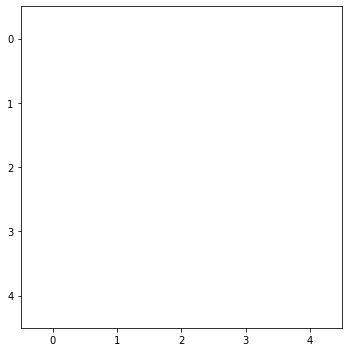

0.0 0.0 (1, 5, 5) 
 (73.37237853, 40.786394969999996, 73.57237853, 40.98639497)


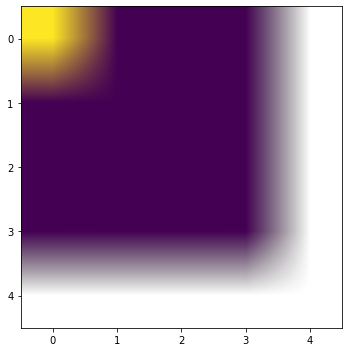

0.0 2.0921135 (1, 5, 5) 
 (73.37237853, 40.786394969999996, 73.57237853, 40.98639497)


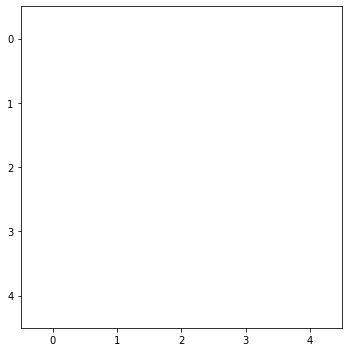

0.0 0.0 (1, 5, 5) 
 (73.37237853, 40.786394969999996, 73.57237853, 40.98639497)


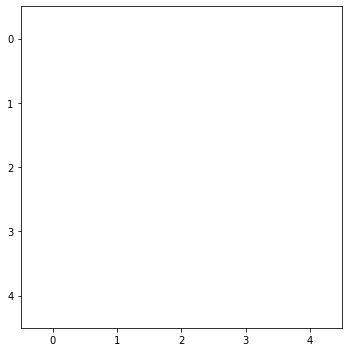

0.0 0.0 (1, 5, 5) 
 (73.37237853, 40.786394969999996, 73.57237853, 40.98639497)


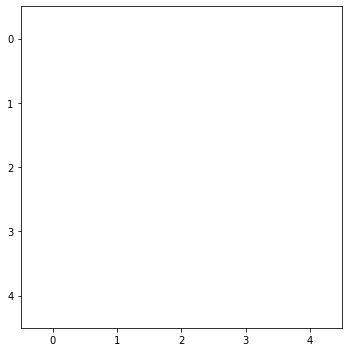

0.0 0.0 (1, 5, 5) 
 (73.37237853, 40.786394969999996, 73.57237853, 40.98639497)


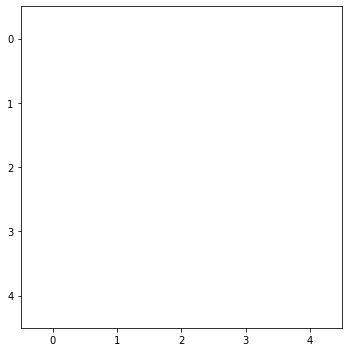

0.0 0.0 (1, 5, 5) 
 (73.37237853, 40.786394969999996, 73.57237853, 40.98639497)


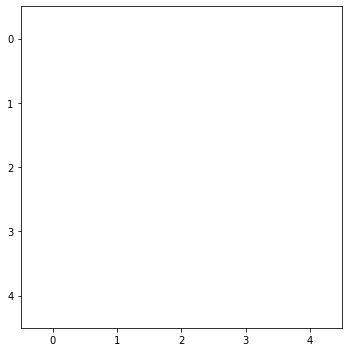

0.0 0.0 (1, 5, 5) 
 (73.37237853, 40.786394969999996, 73.57237853, 40.98639497)


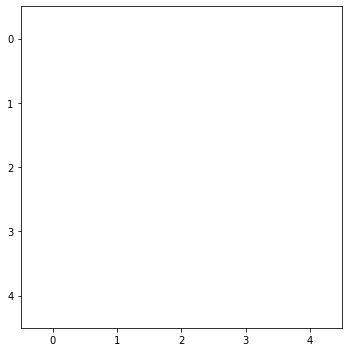

0.0 0.0 (1, 5, 5) 
 (73.37237853, 40.786394969999996, 73.57237853, 40.98639497)


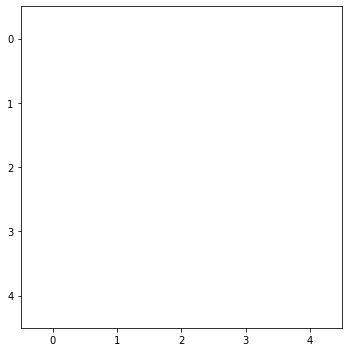

0.0 0.0 (1, 5, 5) 
 (73.37237853, 40.786394969999996, 73.57237853, 40.98639497)


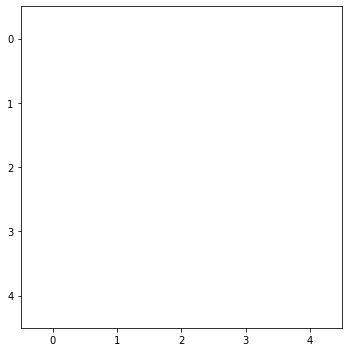

0.0 0.0 (1, 5, 5) 
 (73.37237853, 40.786394969999996, 73.57237853, 40.98639497)


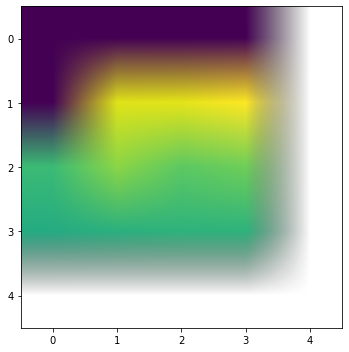

0.0 6.1080437 (1, 5, 5) 
 (73.37237853, 40.786394969999996, 73.57237853, 40.98639497)


In [109]:
scenes, ctx, ini, end = get_scenes(products['weather']['chirps'], buffer_size=0.1, res=0.05)
for i in range(len(scenes)):
    array = scenes[i].ndarray(products['weather']['chirps']['bands'], ctx)
    dl.scenes.display(array, colormap='viridis', size=5)
    
    print(np.min(array),np.max(array), array.shape, '\n', ctx.bounds)